# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (21)

**21/02/2023**

## Centroid-based Clustering

La agrupación en clústeres basada en el centroide (**[Centroid-based clustering](https://en.wikipedia.org/wiki/Cluster_analysis#Centroid-based_clustering:~:text=Centroid%2Dbased%20clustering%5Bedit%5D)**) es un tipo de clustering que divide un conjunto de datos en grupos o clusters en función de la similitud de sus puntos de datos, por eso pertenece al grupo de algoritmos basados en particiones (**partition-based algorithms**). En este método, se calcula un **centroide** para cada grupo, que representa el **centro** o el **promedio** de los puntos de datos dentro del grupo, que **no necesariamente es parte del conjunto de datos**. 



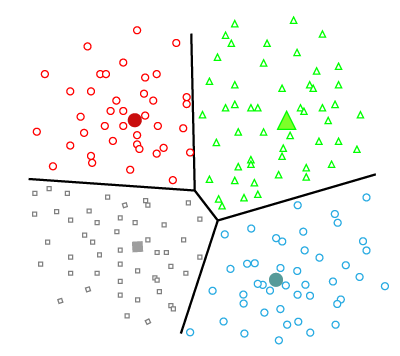

Para diferenciar bien el **promedio** con  o el **punto intermedio** o la **mediana** en un conjunto de datos nos fijamos en los siguientes definiciones y ejemplos: 

### Mean vs. Median

- **Mean/Average ([media aritmética](https://dle.rae.es/medio#:~:text=en%20sent.%20fig.-,media%20aritm%C3%A9tica,-1.%20f))**: Resultado de dividir la suma de varias cantidades por el número de ellas.
- **Median ([mediana](https://dle.rae.es/mediano#:~:text=lado%20opuesto.-,9.%20f.%20Mat.,-Elemento%20de%20una))**: Elemento de una serie ordenada de valores crecientes de forma que la **divide en dos partes iguales**, superiores e inferiores a él.

La **mediana** se puede calcular de la siguiente menera:
- Si el **número de observaciones es impar**, el número del **medio de la lista** ordenada es la mediana. 
- Si el **número de observaciones es par**, entonces la mediana es el **promedio simple de los dos números del medio** de la lista ordenada.

In [ ]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 18, 8 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [ ]:
# Cuando el número de observaciones es impar
A = [1,2,10,20,37]

print(A)
print("La media es igual a : ", pd.Series(A).mean())
print("La mediana es igual a : ", pd.Series(A).median())


In [ ]:
# Cuando el número de observaciones es par
B = [1,2,10,20,37,62]

print(A)
print("La media es igual a : ", pd.Series(B).mean())
print("La mediana es igual a : ", pd.Series(B).median())


La **mediana** en general es un valor mucho más **estable** comparando con la **media** de una variable, en caso de tener **alta dispersión** y en la presencia de **valores atípicos (outliers)**.

In [ ]:
datos = pd.DataFrame({'V1': [1,2,3,4,5,6,7],
                      'V2': [1,2,3,4,5,6,70000]
                      })
display(datos)
display(datos.describe())
print("La media o el valor promedio para V2 es igual a:  ", datos['V2'].mean())
print("La mediana o el valor mediano para V2 es igual a:  ", datos['V2'].median())

### K-Medoids Clustering

La agrupación en clústeres de **[K-Medoids](https://en.wikipedia.org/wiki/K-medoids)** es un algoritmo de clustering basado en particiones al igual que **K-Means** que se conoce a veces como algoritmo **PAM (_Partitioning Around Medoids_)**. En _K-Medoids_, cada clúster está representado por un ___medoide___, que es el **punto de datos más cercano al centro del clúster**.

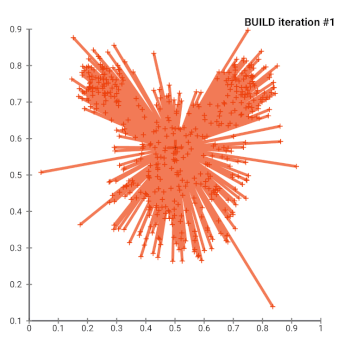

Una de las ventajas del algoritmo **K-Medoids** sobre **K-Means** es que es **menos sensible a los valores atípicos**, ya que **utiliza puntos de datos reales** como medoids, en lugar de la **media de los puntos de datos**.

Usamos el método **`make_blobs`** para generar un **bloque de datos gaussianos isotrópicos** pero eata vez con una **dispersión elevada** que nos permite comparar las dos técnicas de _K-Means_ y _K-Medoids_.

In [ ]:
from sklearn.datasets import make_blobs
datos_clust, etiquetas, centroides = make_blobs(n_samples=10000, centers=5, cluster_std=5, return_centers=True, random_state=10)

# Datos generados sintéticamente
print(centroides)
print(etiquetas)
print(datos_clust)

In [ ]:
sns.scatterplot(x=datos_clust[:,0], y=datos_clust[:,1], hue=etiquetas)
sns.scatterplot(x=centroides[:,0], y=centroides[:,1], color='green', s=90, label='Centroides')
plt.title("Datos sintéticos con alta variabilidad")
plt.show()

Procedemos a normalizar los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

escalado_clust = StandardScaler().fit(datos_clust)
datos_clust_norm = escalado_clust.transform(datos_clust)
datos_clust_norm

In [ ]:
# Verificar las características de los valores estandarizados
display(pd.DataFrame(datos_clust).describe().round(2))
display(pd.DataFrame(datos_clust_norm).describe().round(2))

Creamos un modelo de _K-Means_ clustering, considerando el número de grupos a periori como `K=5`

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


modelo_kmeans = KMeans(n_clusters=5, random_state=100)

modelo_kmeans.fit(datos_clust_norm)

y_etiquetas = modelo_kmeans.labels_

centros_clust = modelo_kmeans.cluster_centers_

print("SSE = ", modelo_kmeans.inertia_)
print("Silhouette score = ", silhouette_score(datos_clust_norm, y_etiquetas))

# Graficar los resultados
sns.scatterplot(x=datos_clust_norm[:,0], y=datos_clust_norm[:,1], hue=y_etiquetas)
sns.scatterplot(x=centros_clust[:,0], y=centros_clust[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

In [ ]:
# Las etiquetas del modelo (clusters)
y_etiquetas

In [ ]:
# El mapeo de etiquetas sabiendo los grupos creados sintéticamente
y_km_label = np.where(y_etiquetas==0, 3, np.where(y_etiquetas==1, 2,
                                         np.where(y_etiquetas==2, 4,
                                         np.where(y_etiquetas==3, 1, 0))))
y_km_label = pd.Series(y_km_label, name='label')
y_km_label

In [ ]:
# Visualizar datos reales vs. datos agrupados
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_clust_norm[:,0], y=datos_clust_norm[:,1], hue=etiquetas, ax=axes[0])
axes[0].set_title("Datos reales etiquetados")

sns.scatterplot(x=datos_clust_norm[:,0], y=datos_clust_norm[:,1], hue=y_km_label, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (K-Means)")

plt.show()

In [ ]:
diff_pos = [i for i in range(len(y_km_label)) if y_km_label[i]!=etiquetas[i]]
print("El modelo de clustering se ha euivocado en clasificar %s puntos" % len(diff_pos))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos)/len(y_km_label))*100))
y_km_label[diff_pos]

In [ ]:
sns.scatterplot(x=datos_clust_norm[:,0], y=datos_clust_norm[:,1], hue=y_km_label)
sns.scatterplot(x=datos_clust_norm[:,0][diff_pos], y=datos_clust_norm[:,1][diff_pos], marker='o', color = 'red', s=30, label='errores')
sns.scatterplot(x=centros_clust[:, 0], y=centros_clust[:, 1], color='blue', s=90, label='cluster_centers')
plt.title("Resutados de clustering, los centros de cada cluster y los datos agrupados erroneamente")
plt.show()

Ahora vamos a instalar una librería que nos proporciona métodos adicionales a las de _sklearn_ y nos permite crear un modelo tipo _K-Medoids clustering_.

In [ ]:
pip install scikit-learn-extra

In [ ]:
# Comprobar la instalación del paquete
import sklearn_extra.cluster

print("sklearn_extra.cluster se ha importado correctamente")

Creamos al igual que el modelo _K-Means_ otro modelo basado en medoides considerando `K=5`

In [ ]:
from sklearn_extra.cluster import KMedoids

modelo_kmedoids = KMedoids(n_clusters=5, random_state=100)

modelo_kmedoids.fit(datos_clust_norm)

y_etiquetas_md = modelo_kmedoids.labels_

centros_clust_md = modelo_kmedoids.cluster_centers_

print("SSE = ", modelo_kmedoids.inertia_)
print("Silhouette score = ", silhouette_score(datos_clust_norm, y_etiquetas_md))

# Graficar los resultados
sns.scatterplot(x=datos_clust_norm[:,0], y=datos_clust_norm[:,1], hue=y_etiquetas_md)
sns.scatterplot(x=centros_clust[:, 0], y=centros_clust[:, 1], color='blue', s=60, label='centroids (K-Means)')
sns.scatterplot(x=centros_clust_md[:,0], y=centros_clust_md[:,1], color='green', s=60, label='medoids (K-Medoids)')
plt.title("Clustering con K-medoids")
plt.show()

Se puede observar que hay una diferencia entre algunos de los centros de clusters reconocidos por cada técnica. 

In [ ]:
y_etiquetas_md

In [ ]:
y_label_md = np.where(y_etiquetas_md==0, 2, np.where(y_etiquetas_md==1, 0,
                                            np.where(y_etiquetas_md==2, 4,
                                            np.where(y_etiquetas_md==3, 3, 1))))
y_label_md = pd.Series(y_label_md, name='label')
y_label_md

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_clust_norm[:,0], y=datos_clust_norm[:,1], hue=etiquetas, ax=axes[0])
axes[0].set_title("Datos reales etiquetados")

sns.scatterplot(x=datos_clust_norm[:,0], y=datos_clust_norm[:,1], hue=y_label_md, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (K-Medoids)")

plt.show()

In [ ]:
diff_pos_md = [i for i in range(len(y_label_md)) if y_label_md[i]!=etiquetas[i]]
print("El modelo de clustering se ha euivocado en clasificar %s puntos" % len(diff_pos_md))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_md)/len(y_label_md))*100))
y_label_md[diff_pos_md]

In [ ]:
print("El modelo K-Medoids ha equivicado en %s puntos menos que el modelo K-Means" % (len(diff_pos)-len(diff_pos_md)))

Vemos que el resultado de este modelo es algo **mejor**, a pesar de la **alta variación** de los datos que ha causado una **difusión** apreciable entre los clusters. 

In [ ]:
sns.scatterplot(x=datos_clust_norm[:,0], y=datos_clust_norm[:,1], hue=y_label_md)
sns.scatterplot(x=datos_clust_norm[:,0][diff_pos], y=datos_clust_norm[:,1][diff_pos], marker='o', color = 'yellow', s=5, label='errores (K-Means)')
sns.scatterplot(x=datos_clust_norm[:,0][diff_pos_md], y=datos_clust_norm[:,1][diff_pos_md], marker='o', color = 'red', s=5, label='errores (K-Medoids)')
sns.scatterplot(x=centros_clust[:, 0], y=centros_clust[:, 1], color='blue', s=60, label='centeroids (K-Means)')
sns.scatterplot(x=centros_clust_md[:,0], y=centros_clust_md[:,1], color='green', s=60, label='medoids (K-Medoids)')
plt.title("Resutados de clustering, los centros de cada cluster y los datos agrupados erroneamente")
plt.show()

Como se puede observar, el algoritmo _K-Means_ tiene unos **errores adicionales** al modelo _K-Medoids_ que se distribuyen principalmente en los **bordes de los clústeres** calculados con una **diferencia notable en la posición de sus centros**, muy probablamente **afectados por la dispersión elevada** en los puntos de datos.  

### Métricas de evaluación del rendimiento de clustering

Evaluar el rendimiento de un algoritmo de clustering **no es tan sencillo** como contar el **número de errores** o la **precisión** de un algoritmo de clasificación supervisado. 

En concreto, **por no disponer de los verdaderos grupos de datos a periori** (si que haya alguno), tenemos que fijarnos para ver si el clustering:
- En primer lugar **separa correctamente los datos no semejantes** y que 
- En segundo lugar los **miembros que pertenecen a la misma clase son más similares que otros** datos según alguna métrica de similitud.

#### 1- **Inertia** (WSS)

La distorsión o la inercia se conoce como la suma de las distancias al cuadrado (**Within-cluster Sum of Squares - WSS**) y se calcula midiendo la distancia entre cada punto de datos y su centroide, elevando al cuadrado esta distancia y sumando estos cuadrados en un grupo.  
Una inercia **más baja** indica un **mejor** ajuste de los clusters a los datos.

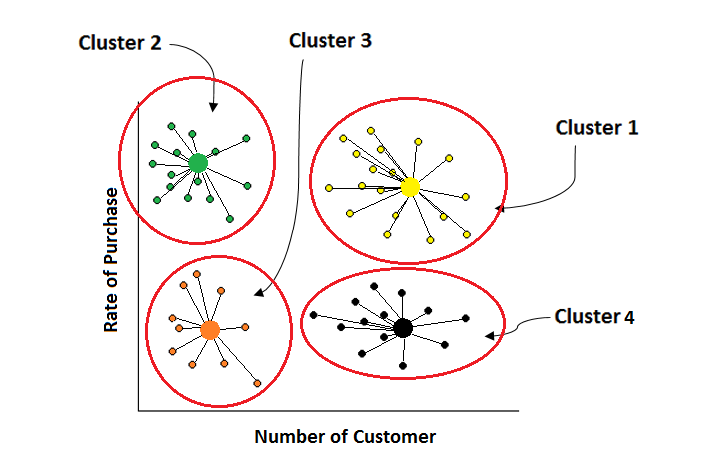

Es evidente que al tener un número mayor de clusters, la suma total de distancias cuadradas también baja. Pero la forma que evoluciona la **inercia** o la **distorsión** nos puede ayudar a la hora de elegir un valor razonable cómo el **núemro de los clusters (K)**. Esta técnica se conoce como el _método del codo (**[Elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering))**)_.

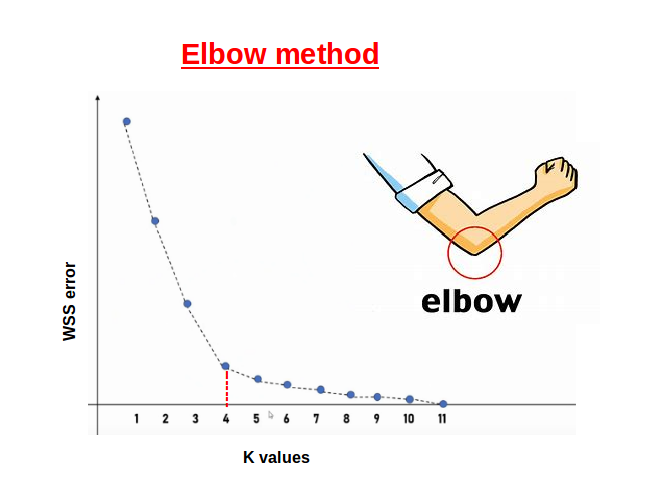

Según esta gráfica tenemos que seleccionar el valor de ___K___ en el **codo**, es decir, el punto después del cual **la distorsión/inercia comienza a disminuir de forma lineal**. 

#### 2- **Silhouette score**

El **criterio de la silueta o [Silhouette coefficient](https://en.wikipedia.org/wiki/Silhouette_(clustering))** mide de alguna manera la similitud que tiene una observación a su propio grupo en comparación con otros clusters. El **promedio** de los coeficientes para todos los puntos de datos se conoce como **Sillhouette score** que **cuanto mayor** sea ese puntaje, **mejor** calidad tendría el algoritmo de clustering. 

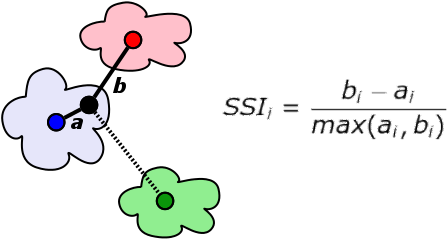

El coeficiente de silueta varía de **−1** a **+1**, donde un valor alto indica que **un punto está bien emparejado con su propio cluster y mal emparejado con los grupos vecinos**. Si la mayoría de los valores son altos, la configuración de clustering en es adecuada. Si muchos puntos tienen un valor bajo o negativo, es posible que haya demasiados o muy pocos clústeres.

#### 3- **Davies-Bouldin score** (DBI) 

La puntuación de Davies-Bouldin o **DBI (Davies–Bouldin index)** se define como la **similitud promedio entre clusters**, donde la similitud es una medida que **compara la distancia entre clusters con el tamaño** de estos mismos grupos.

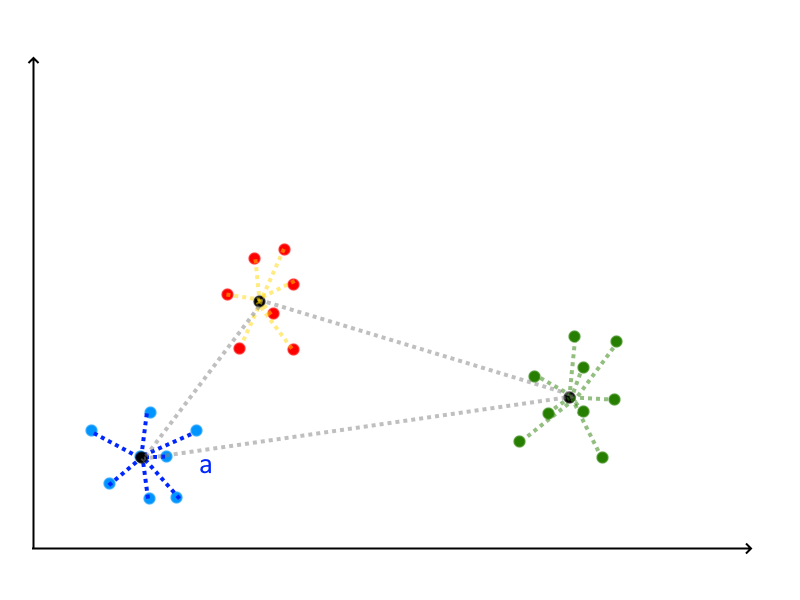

Por lo tanto, los grupos que están **más separados y menos dispersos** darán como resultado una **puntuación menor** que undica una **mejor** calidad de los resultados.

#### 4- **Calinski-Harabasz index** 

El índice de **Calinski-Harabasz** conocido también como **Variance Ratio Criterion** mide la ratio de la varianza entre clusters y la varianza dentro de los clusters.

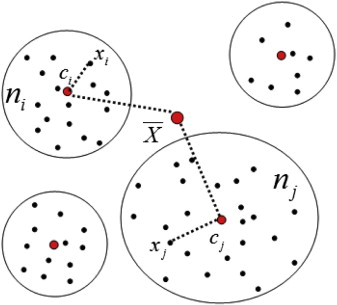

Una **puntuación más alta** de _Calinski-Harabasz_ se relaciona con un modelo con grupos **mejor** definidos.

#### 5- **Bayesian Information Criterion** (BIC)

El criterio de información bayesiano (**BIC**) o el más general **criterio de Schwarz** es un criterio para la selección de modelos basado en la verosimilitud de los resultados considerando una penalización para el número de los parámetros. **Algunos artículos recientes han recomendado encarecidamente el uso de esta métrica en lugar de criterios convencionales como el de _Elbow method_**:  
 **[Stop using the elbow criterion for k-means and how to choose the number of clusters instead](https://arxiv.org/abs/2212.12189)** 

Más adelante probamos una implementación basado en el proyecto **[X-Means](https://github.com/bobhancock/goxmeans/tree/a78e909e374c6f97ddd04a239658c7c5b7365e5c)** traducido en [otro artículo](https://towardsdatascience.com/are-you-still-using-the-elbow-method-5d271b3063bd) desde el lenguaje _Go_.

Vamos a crear un set de datos con un **número considerable de clústeres** y una **varianza mayor que la unidad**, con el fin de comprobar diferentes métricas de rendimiento de clustering.

In [ ]:
from sklearn.datasets import make_blobs
datos_sint, etiquetas_sint, centroides_sint = make_blobs(n_samples=1000, centers=8, cluster_std=1.5, return_centers=True, random_state=10)
sns.scatterplot(x=datos_sint[:,0], y=datos_sint[:,1])
plt.title("Datos sintéticos sin etiquetas")
plt.show()

Como se puede ver, el conjunto de datos contiene varios grupos que tampoco son fáciles de distinguir de forma visual.

In [ ]:
sns.scatterplot(x=datos_sint[:,0], y=datos_sint[:,1], hue=etiquetas_sint)
sns.scatterplot(x=centroides_sint[:,0], y=centroides_sint[:,1], color='green', s=90, label='Centroides')
plt.title("Datos sintéticos etiquetados")
plt.show()

Estandarizamos los datos a continuación:

In [ ]:
from sklearn.preprocessing import StandardScaler

escalado_sint= StandardScaler().fit(datos_sint)
datos_sint_norm = escalado_sint.transform(datos_sint)
datos_sint_norm

In [ ]:
distor_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_sint_norm)
    distor_clust.append(modelo_km.inertia_)

# Obtener una visualización más elaborada 
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=distor_clust, color='green', label='WSS versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Suma de la distancia al cuadrado de cada punto a su centroide", fontsize=16)
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("SSE", fontsize=14)
plt.show()

In [ ]:
sil_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_sint_norm)
    y_modelo_km = modelo_km.predict(datos_sint_norm)
    sil_clust.append(silhouette_score(datos_sint_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=sil_clust, color='green', label='silueta versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Distancia media dentro del grupo (a) entre la distancia media del grupo más cercano (b)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
dav_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_sint_norm)
    y_modelo_km = modelo_km.predict(datos_sint_norm)
    dav_clust.append(davies_bouldin_score(datos_sint_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=dav_clust, color='green', label='the Davies-Bouldin score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Davies-Bouldin index")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("davies_bouldin_score", fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinsk_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_sint_norm)
    y_modelo_km = modelo_km.predict(datos_sint_norm)
    calinsk_clust.append(calinski_harabasz_score(datos_sint_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=calinsk_clust, color='green', label='Calinski and Harabasz score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Variance Ratio Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("calinski_harabasz_score", fontsize=14)
plt.show()


In [ ]:
import math
def bic_score(X, labels):
  """
  BIC score for the goodness of fit of clusters.
  """
    
  n_points = len(labels)
  n_clusters = len(set(labels))
  n_dimensions = X.shape[1]

  n_parameters = (n_clusters - 1) + (n_dimensions * n_clusters) + 1

  loglikelihood = 0
  for label_name in set(labels):
    X_cluster = X[labels == label_name]
    n_points_cluster = len(X_cluster)
    centroid = np.mean(X_cluster, axis=0)
    variance = np.sum((X_cluster - centroid) ** 2) / (len(X_cluster) - 1)
    loglikelihood += \
      n_points_cluster * np.log(n_points_cluster) \
      - n_points_cluster * np.log(n_points) \
      - n_points_cluster * n_dimensions / 2 * np.log(2 * math.pi * variance) \
      - (n_points_cluster - 1) / 2
    
  bic = loglikelihood - (n_parameters / 2) * np.log(n_points)
        
  return bic

In [ ]:
bic_clust = []
for k in range(2, 15):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_sint_norm)
    y_modelo_km = modelo_km.predict(datos_sint_norm)
    bic_clust.append(bic_score(datos_sint_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,15), y=bic_clust, color='green', label='BIC score versus K', linewidth=3)
plt.xticks(range(2,15))
plt.title("Bayesian Information Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score", fontsize=14)
plt.show()


---

###  Mean Shift Clustering

El algoritmo _Mean Shift_ es un algoritmo basado en centroide (_centroid-based_) funciona **desplazando los puntos de datos hacia los centroides en zonas más densas** para que sean la media de otros puntos de la región.

Estos candidatos luego se filtran en una etapa de **posprocesamiento para eliminar casi duplicados** y de esta manera formar el conjunto final de centroides.

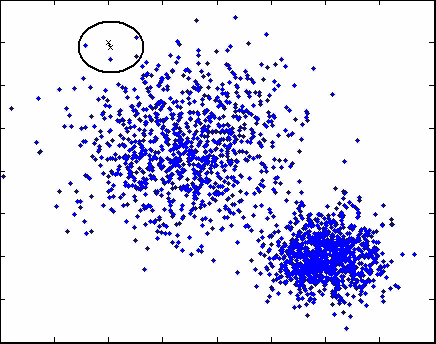

La principal ventaja de _Mean Shift_ es un algoritmo **no paramétrico** que no requiere un conocimiento previo del núemro de grupos o el valor de _`K`_ en los datos. Para comprobarlo realizamos un ejercicio con los datos no distribuidos uniformamente. 

### Ejemplo de datos anisótropos

Los **datos distribuidos anisotrópicamente** se refieren a datos que **no están distribuidos uniformemente en todas las direcciones**, lo que significa que la **distribución de los datos varía según la dirección de observación**. Esto puede ocurrir cuando los datos exhiben algún tipo de dependencia direccional o estructural subyacente, como por ejemplo en **formaciones geológicas**.

Por el contrario, los **datos isotrópicos se distribuyen uniformemente en todas las direcciones** y no muestran ninguna dependencia direccional. Los ejemplos de datos isotrópicos incluyen **muestras aleatorias de una distribución uniforme**.

In [ ]:
data_aniso, etiquetas_aniso, centers_aniso = make_blobs(n_samples=1000, centers=([[-15,3],[0,6],[25,25]]), cluster_std=[1, 2, 3],
                                                        return_centers=True, random_state=642)
transform = [[1, -0.5], [-0.7, 0.8]]
datos_aniso = np.dot(data_aniso, transform)
centroides_aniso = np.dot(centers_aniso, transform)

sns.scatterplot(x=datos_aniso[:,0], y=datos_aniso[:,1], hue=etiquetas_aniso)
sns.scatterplot(x=centroides_aniso[:,0], y=centroides_aniso[:,1], color='green', s=90, label='Centroides')
plt.title("Datos sintéticos distribuidos anisotrópicamente")
plt.show()

In [ ]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler

escalado_aniso = StandardScaler().fit(datos_aniso)
datos_aniso_norm = escalado_aniso.transform(datos_aniso)
datos_aniso_norm

In [ ]:
# Verificar las características de los valores estandarizados
display(pd.DataFrame(datos_aniso).describe().round(2))
display(pd.DataFrame(datos_aniso_norm).describe().round(2))

In [ ]:
distor_clust = []
for k in range(2, 10):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_aniso_norm)
    distor_clust.append(modelo_km.inertia_)

# Obtener una visualización más elaborada 
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,10), y=distor_clust, color='green', label='WSS versus K', linewidth=3)
plt.xticks(range(2,10))
plt.title("Suma de la distancia al cuadrado de cada punto a su centroide", fontsize=16)
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("WSS", fontsize=14)
plt.show()

In [ ]:
sil_clust = []
for k in range(2, 10):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_aniso_norm)
    y_modelo_km = modelo_km.predict(datos_aniso_norm)
    sil_clust.append(silhouette_score(datos_aniso_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,10), y=sil_clust, color='green', label='silueta versus K', linewidth=3)
plt.xticks(range(2,10))
plt.title("Distancia media dentro del grupo (a) entre la distancia media del grupo más cercano (b)")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("silhouette_score", fontsize=14)
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
dav_clust = []
for k in range(2, 10):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_aniso_norm)
    y_modelo_km = modelo_km.predict(datos_aniso_norm)
    dav_clust.append(davies_bouldin_score(datos_aniso_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,10), y=dav_clust, color='green', label='the Davies-Bouldin score versus K', linewidth=3)
plt.xticks(range(2,10))
plt.title("Davies-Bouldin index")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("davies_bouldin_score", fontsize=14)
plt.show()


In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinsk_clust = []
for k in range(2, 10):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_aniso_norm)
    y_modelo_km = modelo_km.predict(datos_aniso_norm)
    calinsk_clust.append(calinski_harabasz_score(datos_aniso_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,10), y=calinsk_clust, color='green', label='Calinski and Harabasz score versus K', linewidth=3)
plt.xticks(range(2,10))
plt.title("Variance Ratio Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("calinski_harabasz_score", fontsize=14)
plt.show()


In [ ]:
bic_clust = []
for k in range(2, 10):
    modelo_km = KMeans(n_clusters=k, random_state=100)
    modelo_km.fit(datos_aniso_norm)
    y_modelo_km = modelo_km.predict(datos_aniso_norm)
    bic_clust.append(bic_score(datos_aniso_norm, y_modelo_km))

# Obtener una visualización del valor de silueta
plt.figure(figsize=(16, 7))
sns.lineplot(x=range(2,10), y=bic_clust, color='green', label='BIC score versus K', linewidth=3)
plt.xticks(range(2,10))
plt.title("Bayesian Information Criterion")
plt.xlabel("Número de Clusters", fontsize=14)
plt.ylabel("bic_score", fontsize=14)
plt.show()


Se puede apreciar que ninguna métrica ha podido estimar correctamente el número de los grupos presentes en los datos. Procedemos a crear un modelo de clustering usando la técnica de ***Mean Shift*** que no requiere conocer el hiperparametro de `K` a periori. 

In [ ]:
from sklearn.cluster import MeanShift

modelo_ms = MeanShift(bin_seeding=True)

modelo_ms.fit(datos_aniso_norm)

y_etiquetas_ms = modelo_ms.labels_

centros_aniso_ms = modelo_ms.cluster_centers_

print("Silhouette score = ", silhouette_score(datos_aniso_norm, y_etiquetas_ms))

# Graficar los resultados
sns.scatterplot(x=datos_aniso_norm[:,0], y=datos_aniso_norm[:,1], hue=y_etiquetas_ms)
sns.scatterplot(x=centros_aniso_ms[:,0], y=centros_aniso_ms[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con Mean Shift")
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_aniso_norm[:,0], y=datos_aniso_norm[:,1], hue=etiquetas_aniso, ax=axes[0])
axes[0].set_title("Datos sintéticos con etiquetas")

sns.scatterplot(x=datos_aniso_norm[:,0], y=datos_aniso_norm[:,1], hue=y_etiquetas_ms, ax=axes[1])
axes[1].set_title("Datos etiquetados por clustering (Mean Shift)")

plt.show()

In [ ]:
diff_pos_ms = [i for i in range(len(y_etiquetas_ms)) if y_etiquetas_ms[i]!=etiquetas_aniso[i]]
print("El modelo de clustering se ha euivocado en clasificar %s puntos" % len(diff_pos_ms))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_ms)/len(y_etiquetas_ms))*100))
y_etiquetas_ms[diff_pos_ms]

Ahora desarrollamos un algoritmo de _K-Means clustering_ suponiendo conocer previamente el número de los grupos existentes en los datos.

In [ ]:
from sklearn.cluster import KMeans


modelo_km_aniso = KMeans(n_clusters=3, random_state=100)

modelo_km_aniso.fit(datos_aniso_norm)

y_km_aniso = modelo_km_aniso.labels_

centros_aniso_km = modelo_km_aniso.cluster_centers_

print("SSE = ", modelo_km_aniso.inertia_)
print("Silhouette score = ", silhouette_score(datos_aniso_norm, y_km_aniso))

# Graficar los resultados
sns.scatterplot(x=datos_aniso_norm[:,0], y=datos_aniso_norm[:,1], hue=y_km_aniso)
sns.scatterplot(x=centros_aniso_km[:,0], y=centros_aniso_km[:,1], color='blue', s=60, label='cluster_centers')
plt.title("Clustering con K-means")
plt.show()

In [ ]:
y_label_km_aniso = np.where(y_km_aniso==0, 2, np.where(y_km_aniso==1, 0, 1))
y_label_km_aniso = pd.Series(y_label_km_aniso, name='label')
y_label_km_aniso

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))

sns.scatterplot(x=datos_aniso_norm[:,0], y=datos_aniso_norm[:,1], hue=etiquetas_aniso, ax=axes[0])
axes[0].set_title("Datos sintéticos etiquetados")

sns.scatterplot(x=datos_aniso_norm[:,0], y=datos_aniso_norm[:,1], hue=y_label_km_aniso, ax=axes[1])
axes[1].set_title("Datos agrupados por clustering (K-Means)")

plt.show()

In [ ]:
diff_pos_km_aniso = [i for i in range(len(y_label_km_aniso)) if y_label_km_aniso[i]!=etiquetas_aniso[i]]
print("El modelo de clustering se ha euivocado en clasificar %s puntos" % len(diff_pos_km_aniso))
print("El porcentage de acierto es {acc}%".format(acc=(1-len(diff_pos_km_aniso)/len(y_label_km_aniso))*100))
y_label_km_aniso[diff_pos_ms]

El modelo de _Mean Shift_ ha sacado mejore resultados (_aproximadamente 10 %_) y encima sin necesidad de saber de antemano el número de los clústeres. 

---

### **`Ejercicio 21.1`**

Vamos a revisar algunas fuentes de datos en internet para usar el concepto de **Open Data** o datasets disponibles al público que nos permiten practicar diferentes problemas de tipo **Regresión**, **Clasificación** o **Clustring** aplicando varias técnicas **que hemos aprendido hasta ahora y en las sesiones anteriores**. 

De este modo cada alumn@ escogería un **proyecto distinto** que **no se haya utilizado a lo largo de este curso** para desarrollarlo y presentarlo como el **`proyecto final del módulo1`**. 

- **[Top 23 Best Public Datasets for Practicing Machine Learning](https://rubikscode.net/2021/07/19/top-23-best-public-datasets-for-practicing-machine-learning/)**: Una colección de casos de uso de [Rubik’s Code](https://rubikscode.net/) escogidos por [Nikola Živković](https://rubikscode.net/deep-learning-for-programmers/#:~:text=ABOUT%20THE%20AUTHOR-,Nikola%20%C5%BDivkovi%C4%87,-is%20a%20software).  

- **[The UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php)**: Uno de los repositorios más comúnes entre la comunidad global de científicos de datos con cientos de ejemplos basados en datos reales. 

**`21.1`** Elige un caso de uso según los ejemplos que se encuentran en las **dos fuentes indicadas** y entrega el conjunto de datos a utilizar para el proyecto como un **adjunto a la tarea**.

**`21.2`** Prepara una **presentación** resumiendo en qué consiste el **dataset**, el **planteamiento del problema** y tu **propuesta** para resolver el problema sin llegar a desarrollarlo todavía.

...and that's it all!!! 